# Supervised Learning - Project

In this Project, we are going to perform a full supervised learning machine learning project on a "Diabetes" dataset. This dataset is originally from the National Institute of Diabetes and Digestive and Kidney
Diseases. The objective of the dataset is to diagnostically predict whether a patient has diabetes,
based on certain diagnostic measurements included in the dataset. 

[Kaggle Dataset](https://www.kaggle.com/datasets/akshaydattatraykhare/diabetes-dataset)

# Part I : EDA - Exploratory Data Analysis

For this task, you are required to conduct an exploratory data analysis on the diabetes dataset. You have the freedom to choose the visualizations you want to use, but your analysis should cover the following tasks mostly:

- Are there any missing values in the dataset?
- How are the predictor variables related to the outcome variable?
- What is the correlation between the predictor variables?
- What is the distribution of each predictor variable?
- Are there any outliers in the predictor variables?
- How are the predictor variables related to each other?
- Is there any interaction effect between the predictor variables?
- What is the average age of the individuals in the dataset?
- What is the average glucose level for individuals with diabetes and without diabetes?
- What is the average BMI for individuals with diabetes and without diabetes?
- How does the distribution of the predictor variables differ for individuals with diabetes and without diabetes?
- Are there any differences in the predictor variables between males and females (if gender information is available)?

In [12]:
import pandas as pd
import numpy as np
import seaborn as sns
from matplotlib import pyplot as plt

In [3]:
df = pd.read_csv('diabetes.csv')

In [43]:
df.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,121.681605,72.254807,20.536458,31.992578,0.471876,33.240885,0.348958
std,3.369578,30.436016,12.115932,15.952218,7.884160,0.331329,11.760232,0.476951
min,0.000000,44.000000,24.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.750000,64.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,67.100000,2.420000,81.000000,1.000000


In [5]:
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


<Axes: xlabel='Pregnancies', ylabel='Count'>

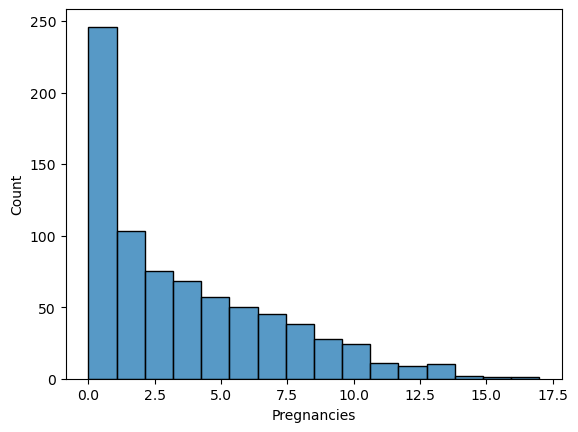

In [15]:
# Viewing distributions for each feature

sns.histplot(data=df['Pregnancies'])

<Axes: xlabel='Glucose', ylabel='Count'>

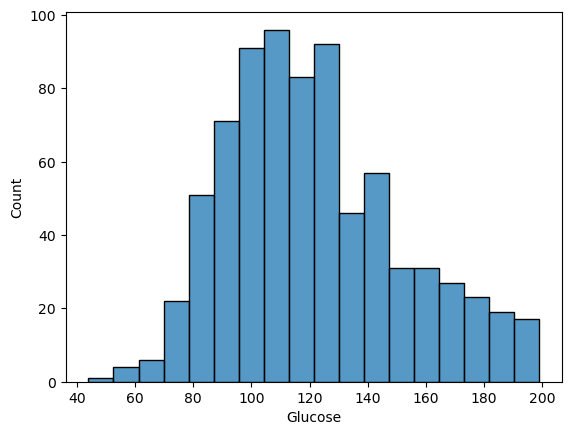

In [33]:
sns.histplot(data=df['Glucose'])

<Axes: xlabel='BloodPressure', ylabel='Count'>

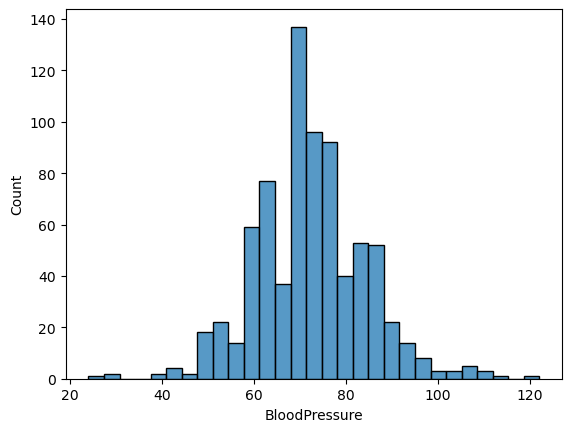

In [37]:
sns.histplot(data=df['BloodPressure'])

<Axes: xlabel='SkinThickness', ylabel='Count'>

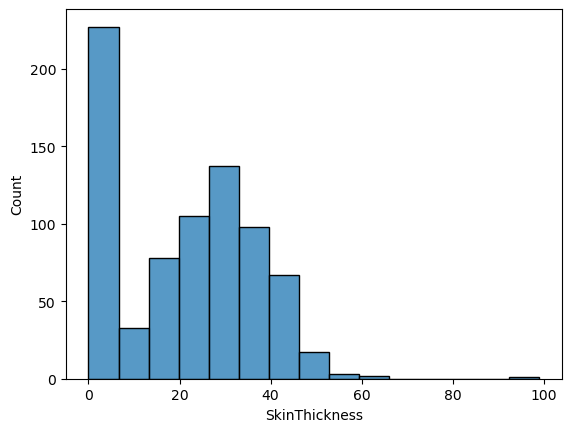

In [22]:
sns.histplot(data=df['SkinThickness'])

<Axes: xlabel='Insulin', ylabel='Count'>

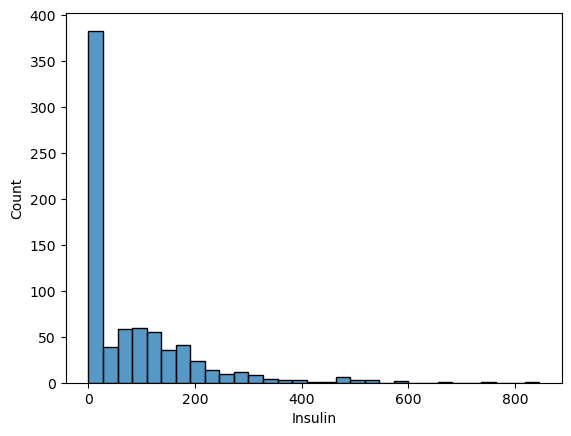

In [20]:
sns.histplot(data=df['Insulin'])

<Axes: xlabel='BMI', ylabel='Count'>

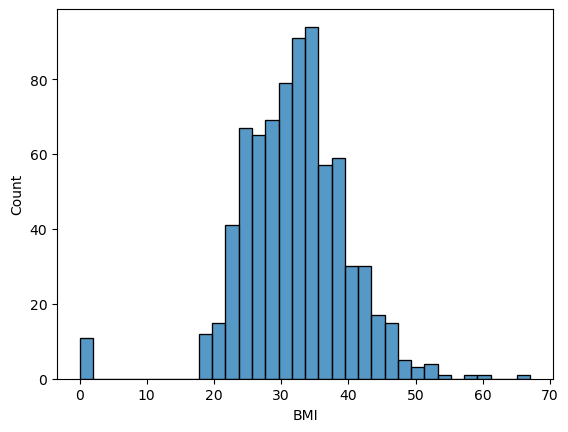

In [21]:
sns.histplot(data=df['BMI'])

<Axes: xlabel='DiabetesPedigreeFunction', ylabel='Count'>

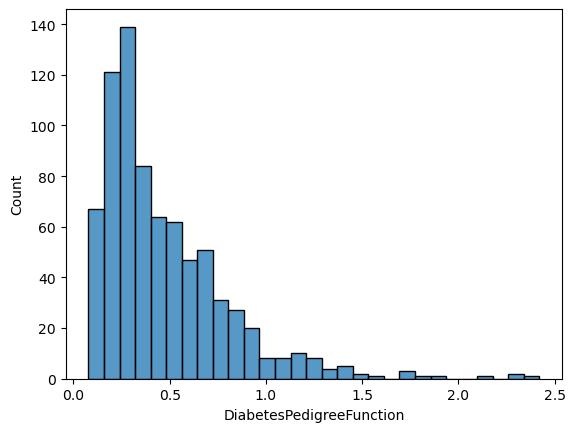

In [24]:
sns.histplot(data=df['DiabetesPedigreeFunction'])

<Axes: xlabel='Age', ylabel='Count'>

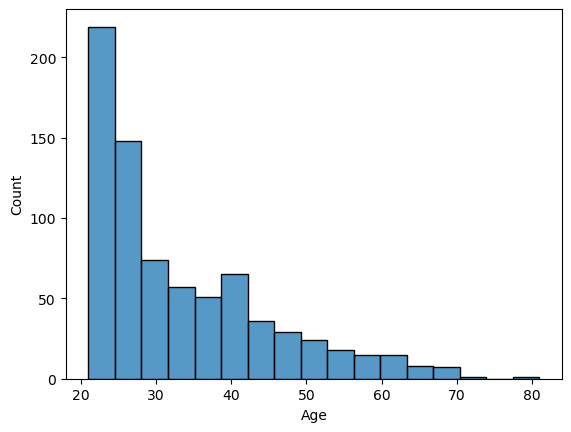

In [25]:
sns.histplot(data=df['Age'])

<Axes: xlabel='Outcome', ylabel='Count'>

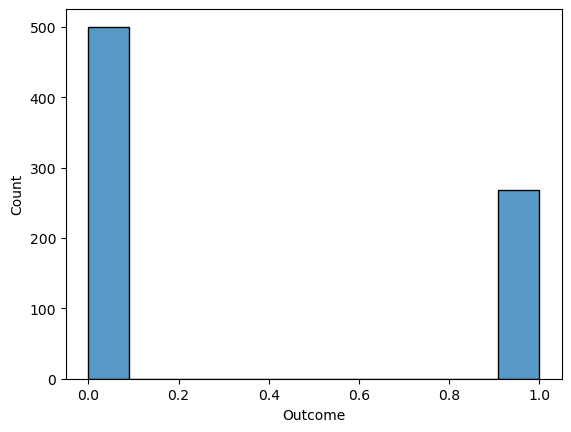

In [26]:
sns.histplot(data=df['Outcome'])

# Part II : Preprocessing & Feature Engineering

You need to perform preprocessing on the given dataset. Please consider the following tasks and carry out the necessary steps accordingly.
- Handling missing values
- Handling outliers
- Scaling and normalization
- Feature Engineering
- Handling imbalanced data

In [ ]:
# Dropping Insulin column, too many zeros
df = df.drop('Insulin',axis=1)

In [30]:
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,33.6,0.627,50,1
1,1,85,66,29,26.6,0.351,31,0
2,8,183,64,0,23.3,0.672,32,1
3,1,89,66,23,28.1,0.167,21,0
4,0,137,40,35,43.1,2.288,33,1


In [44]:
# Changing zeros to mean for all columns except pregnancies

df['Glucose'] = np.where(df['Glucose']==0,df['Glucose'].mean(),df['Glucose'])
df['BloodPressure'] = np.where(df['BloodPressure']==0,df['BloodPressure'].mean(),df['BloodPressure'])
df['SkinThickness'] = np.where(df['SkinThickness']==0,df['SkinThickness'].mean(),df['SkinThickness'])
df['BMI'] = np.where(df['BMI']==0,df['BMI'].mean(),df['BMI'])
df['DiabetesPedigreeFunction'] = np.where(df['DiabetesPedigreeFunction']==0,df['DiabetesPedigreeFunction'].mean(),df['DiabetesPedigreeFunction'])
df['Age'] = np.where(df['Age']==0,df['Age'].mean(),df['Age'])

In [65]:
# Splitting the data into depenedant (y) and independant (X) variables

X = df.drop('Outcome',axis=1)
y = df['Outcome']

In [66]:
# Scaling
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
scaler.fit(X)
X_scaled = pd.DataFrame(data=scaler.transform(X))
X_scaled.columns = X.columns
X_scaled

,Pregnancies,Glucose,BloodPressure,SkinThickness,BMI,DiabetesPedigreeFunction,Age
0,0.352941,0.670968,0.489796,0.304348,0.314928,0.234415,0.483333
1,0.058824,0.264516,0.428571,0.239130,0.171779,0.116567,0.166667
2,0.470588,0.896774,0.408163,0.147135,0.104294,0.253629,0.183333
3,0.058824,0.290323,0.428571,0.173913,0.202454,0.038002,0.000000
4,0.000000,0.600000,0.163265,0.304348,0.509202,0.943638,0.200000
...,...,...,...,...,...,...,...
763,0.588235,0.367742,0.530612,0.445652,0.300613,0.039710,0.700000
764,0.117647,0.503226,0.469388,0.217391,0.380368,0.111870,0.100000
765,0.294118,0.496774,0.489796,0.173913,0.163599,0.071307,0.150000
766,0.058824,0.529032,0.367347,0.147135,0.243354,0.115713,0.433333


# Part III : Training ML Model

For this task, you are required to build a machine learning model to predict the outcome variable. This will be a binary classification task, as the target variable is binary. You should select at least two models, one of which should be an ensemble model, and compare their performance.

- Train the models: Train the selected models on the training set.
- Model evaluation: Evaluate the trained models on the testing set using appropriate evaluation metrics, such as accuracy, precision, recall, F1-score, and ROC-AUC.
- Model comparison: Compare the performance of the selected models and choose the best-performing model based on the evaluation metrics. You can also perform additional analysis, such as model tuning and cross-validation, to improve the model's performance.

In [75]:
# Splitting data into train and test sets

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test= train_test_split(X_scaled, y, test_size=0.2, random_state=42)

In [77]:
# Training the model

from sklearn.linear_model import LogisticRegression

clf = LogisticRegression()
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)

In [78]:
# Calculating the accuracy of the model

from sklearn.metrics import accuracy_score
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy: {:.2f}%".format(accuracy * 100))

Accuracy: 77.92%


Text(0.5, 1.0, 'Confusion Matrix')

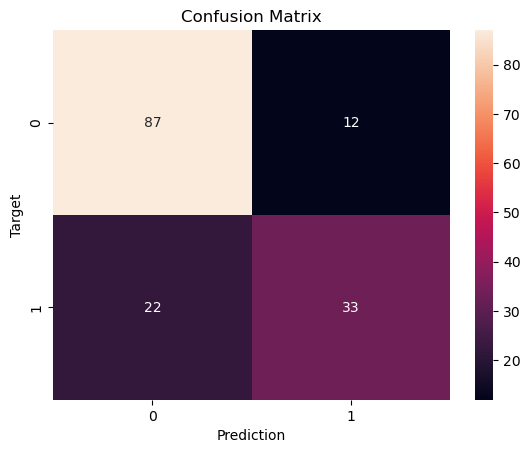

In [79]:
# Confusion matrix to help evaluate the model

from sklearn.metrics import confusion_matrix
cf = confusion_matrix(y_test, y_pred)
plt.figure()
sns.heatmap(cf, annot=True)
plt.xlabel('Prediction')
plt.ylabel('Target')
plt.title('Confusion Matrix')

# Part IV : Conclusion

From the machine learning models developed and the exploratory data analysis (EDA) conducted, generate four bullet points as your findings.

In [107]:
# Looking at the coefficient for each feature to see which ones had the greater impact of the model

pd.DataFrame({'Feature': X.columns,
              'Coefficient': sum(clf.coef_.tolist(),[]),
              'Absolute Coef': np.abs(sum(clf.coef_.tolist(),[]))}).sort_values('Absolute Coef',ascending=False)


,Feature,Coefficient,Absolute Coef
1,Glucose,4.124506,4.124506
4,BMI,2.936597,2.936597
6,Age,1.566977,1.566977
5,DiabetesPedigreeFunction,1.003977,1.003977
0,Pregnancies,0.989695,0.989695
3,SkinThickness,0.536504,0.536504
2,BloodPressure,-0.139577,0.139577


In [ ]:
# Conclusions

"""
1. The model is around 60% accurate at predicting diabetes when they have diabetes.  This isn't great
2. The model is 88% accurate at predicitng someone doesn't have diabetes when they don't have diabetes.  This is pretty good.
3. The most important features to look at are Glucose, BMI, and Age.
4. Blood pressure has a negative correlation with the chance of having diabetes.

"""